In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

In [124]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')

강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2], ignore_index=True)
print(len(강서_데이터))
일별_강서_데이터= 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

3385613


In [125]:
기상청_데이터 = pd. read_csv('../../Data/기상청/기온강수량미세먼지2.csv',encoding='utf-8')
type(기상청_데이터)

pandas.core.frame.DataFrame

In [126]:
# Series를 DataFrame으로 변환
일별_강서_데이터 = pd.DataFrame(일별_강서_데이터.items(), columns=['기준_날짜', '전체_건수'])


In [127]:
일별_강서_데이터

,기준_날짜,전체_건수
0,2023-04-03,16354
1,2023-04-04,13309
2,2023-04-05,2191
3,2023-04-06,7303
4,2023-04-07,14320
...,...,...
236,2024-03-25,6757
237,2024-03-26,9299
238,2024-03-27,15206
239,2024-03-28,9280


In [128]:
import pandas as pd
# 휴일 데이터
휴일 = [
    {"날짜": "2023-05-05"},
    {"날짜": "2023-05-29"},
    {"날짜": "2023-06-06"},
    {"날짜": "2023-08-15"},
    {"날짜": "2023-09-28"},
    {"날짜": "2023-09-29"},
    {"날짜": "2023-10-02"},
    {"날짜": "2023-10-03"},
    {"날짜": "2023-10-09"},
    {"날짜": "2023-12-25"},
    {"날짜": "2024-01-01"},
    {"날짜": "2024-02-09"},
    {"날짜": "2024-02-12"},
    {"날짜": "2024-03-01"},
]
# 주말과 휴일을 분류하는 함수 정의
def classify_weekend_and_holidays(df, holidays):
    # '일시' 열을 datetime 형식으로 변환
    df['일시'] = pd.to_datetime(df['일시'])
    
    # 주말(토요일: 5, 일요일: 6)인지 여부를 나타내는 열 추가
    df['요일'] = df['일시'].dt.dayofweek  # 0: 월요일, 1: 화요일, ..., 6: 일요일
    df['주말'] = df['요일'].apply(lambda x: 1 if x >= 5 else 0)  # 토요일(5) 또는 일요일(6)이면 주말로 분류
    
    # 휴일인지 여부를 나타내는 열 추가
    df['휴일'] = df['일시'].apply(lambda x: 1 if str(x.date()) in [h['날짜'] for h in holidays] else 0)
    
    # 주말과 휴일으로 데이터 분리
    주말_df = df[(df['주말'] == 1) | (df['휴일'] == 1)]
    주중_df = df[(df['주말'] == 0) & (df['휴일'] == 0)]
    
    return 주말_df, 주중_df

# 함수 호출
기상청_주말_데이터, 기상청_주중_데이터 = classify_weekend_and_holidays(기상청_데이터, 휴일)


In [129]:
기상청_주중_데이터.rename(columns={'일시': '기준_날짜'}, inplace=True)
기상청_주중_데이터

C:\Users\ciw96\AppData\Local\Temp\ipykernel_33732\2369903020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기상청_주중_데이터.rename(columns={'일시': '기준_날짜'}, inplace=True)


,기준_날짜,미세먼지,초미세먼지,지점,지점명,평균기온(°C),일강수량(mm),요일,주말,휴일
2,2023-04-03,58,32,108,서울,19.0,NaN,0,0,0
3,2023-04-04,38,18,108,서울,17.6,6.9,1,0,0
4,2023-04-05,20,10,108,서울,11.9,50.3,2,0,0
5,2023-04-06,73,55,108,서울,8.8,2.7,3,0,0
6,2023-04-07,74,33,108,서울,8.9,NaN,4,0,0
...,...,...,...,...,...,...,...,...,...,...
390,2024-03-25,25,9,108,서울,10.6,5.1,0,0,0
391,2024-03-26,4,1,108,서울,7.4,11.5,1,0,0
392,2024-03-27,24,15,108,서울,10.4,NaN,2,0,0
393,2024-03-28,25,11,108,서울,10.3,1.9,3,0,0


In [130]:
# 기상청_주중_데이터의 '기준_날짜' 열을 datetime 형식으로 변환
기상청_주중_데이터['기준_날짜'] = pd.to_datetime(기상청_주중_데이터['기준_날짜'])

# 일별_강서_데이터의 '기준_날짜' 열을 datetime 형식으로 변환
일별_강서_데이터['기준_날짜'] = pd.to_datetime(일별_강서_데이터['기준_날짜'])

# 두 데이터프레임의 '기준_날짜' 값을 비교하여 있는 값과 없는 값을 구분
공통_날짜 = pd.merge(기상청_주중_데이터, 일별_강서_데이터, on='기준_날짜', how='inner')['기준_날짜']
기상청_누락_날짜 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(공통_날짜)]['기준_날짜']
강서_누락_날짜 = 일별_강서_데이터[~일별_강서_데이터['기준_날짜'].isin(공통_날짜)]['기준_날짜']

print("기상청 데이터에만 있는 날짜:")
print(기상청_누락_날짜)


기상청 데이터에만 있는 날짜:
307   2024-01-02
341   2024-02-05
342   2024-02-06
355   2024-02-19
356   2024-02-20
Name: 기준_날짜, dtype: datetime64[ns]


C:\Users\ciw96\AppData\Local\Temp\ipykernel_33732\4210034619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기상청_주중_데이터['기준_날짜'] = pd.to_datetime(기상청_주중_데이터['기준_날짜'])


In [131]:
기상청_주중_데이터 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(기상청_누락_날짜)]

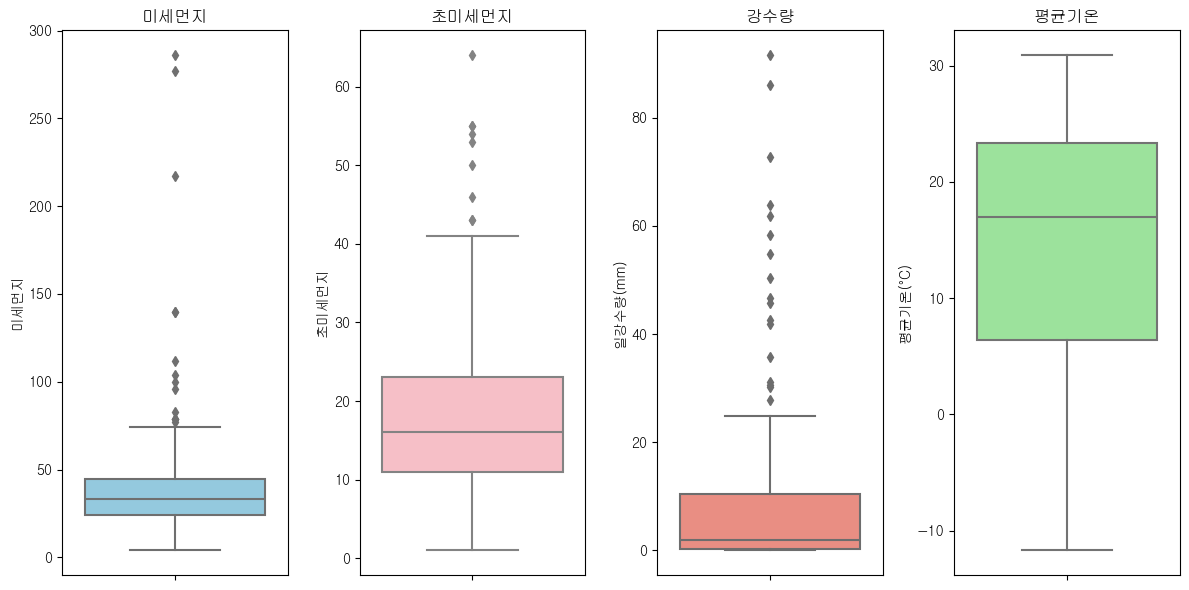

In [132]:

# 이상치를 보기 위해 기상 데이터와 강수량, 평균 기온, 초미세먼지를 병합
데이터 = pd.concat([기상청_주중_데이터[['미세먼지', '초미세먼지', '일강수량(mm)', '평균기온(°C)']], 일별_강서_데이터['전체_건수']], axis=1)

# Boxplot 그리기
plt.figure(figsize=(12, 6))

# 미세먼지의 Boxplot
plt.subplot(1, 4, 1)
sns.boxplot(y=데이터['미세먼지'], color='skyblue')
plt.title('미세먼지')

# 초미세먼지의 Boxplot
plt.subplot(1, 4, 2)
sns.boxplot(y=데이터['초미세먼지'], color='lightpink')
plt.title('초미세먼지')

# 강수량의 Boxplot
plt.subplot(1, 4, 3)
sns.boxplot(y=데이터['일강수량(mm)'], color='salmon')
plt.title('강수량')

# 평균 기온의 Boxplot
plt.subplot(1, 4, 4)
sns.boxplot(y=데이터['평균기온(°C)'], color='lightgreen')
plt.title('평균기온')

plt.tight_layout()
plt.show()

In [136]:

# 기상청 데이터와 일별 데이터를 기준_날짜를 기준으로 병합
데이터 = pd.merge(기상청_주중_데이터, 일별_강서_데이터, on='기준_날짜', how='inner')

# 상관관계 계산
correlation_micron = 데이터['미세먼지'].corr(데이터['전체_건수'])
correlation_micron2 = 데이터['초미세먼지'].corr(데이터['전체_건수'])
correlation_rainfall = 데이터['일강수량(mm)'].corr(데이터['전체_건수'])
correlation_temperature = 데이터['평균기온(°C)'].corr(데이터['전체_건수'])
correlation_all = 데이터[['미세먼지','초미세먼지', '일강수량(mm)', '평균기온(°C)','전체_건수']].corr()['전체_건수']


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

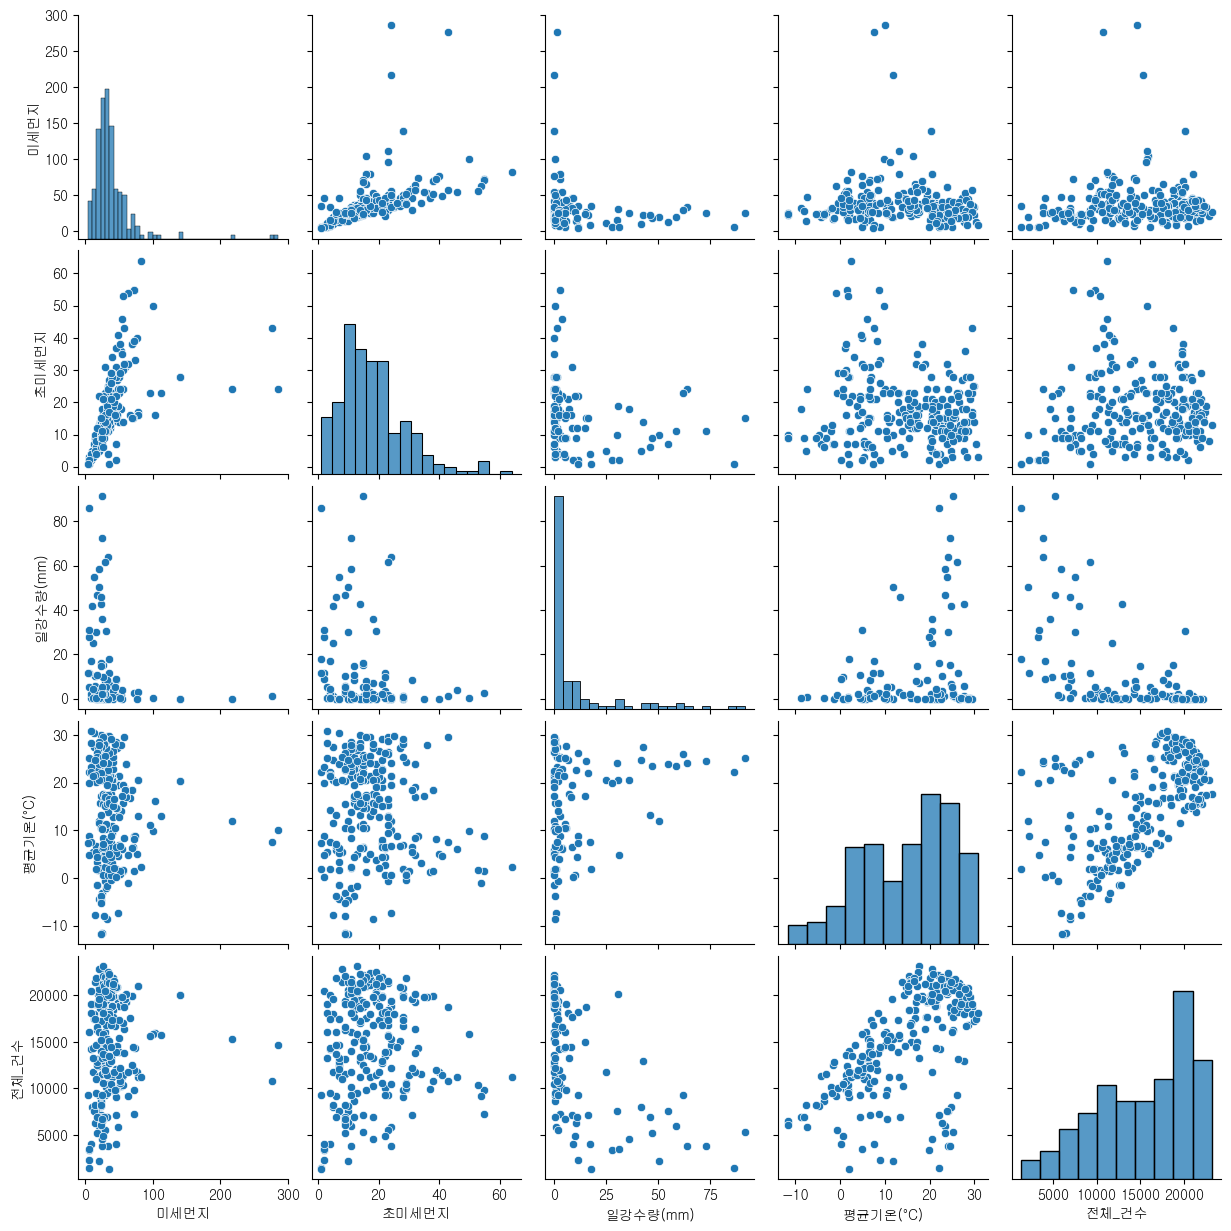

미세먼지와 전체_건수의 상관관계: 0.06285749066215539
초미세먼지와 전체_건수의 상관관계: 0.040195739036415955
강수량과 전체_건수의 상관관계: -0.564625259241704
평균기온과 전체_건수의 상관관계: 0.6030319747813816
위 3가지와 전체_건수의 상관관계:
미세먼지        0.062857
초미세먼지       0.040196
일강수량(mm)   -0.564625
평균기온(°C)    0.603032
전체_건수       1.000000
Name: 전체_건수, dtype: float64


In [137]:

# 시각화    
sns.pairplot(데이터[['미세먼지','초미세먼지','일강수량(mm)', '평균기온(°C)', '전체_건수']])
plt.show()

# 상관관계 출력
print("미세먼지와 전체_건수의 상관관계:", correlation_micron)
print("초미세먼지와 전체_건수의 상관관계:", correlation_micron2)
print("강수량과 전체_건수의 상관관계:", correlation_rainfall)
print("평균기온과 전체_건수의 상관관계:", correlation_temperature)
print("위 3가지와 전체_건수의 상관관계:")
print(correlation_all)

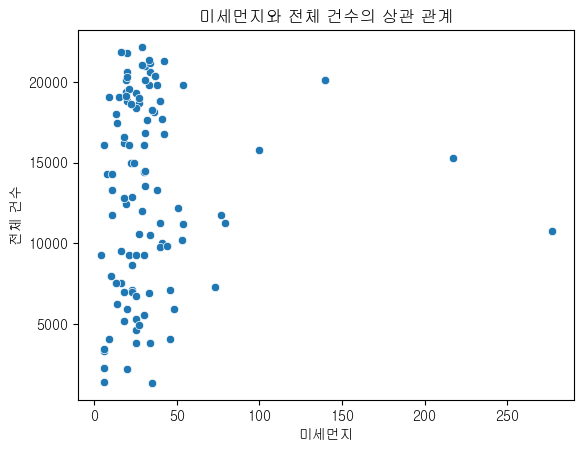

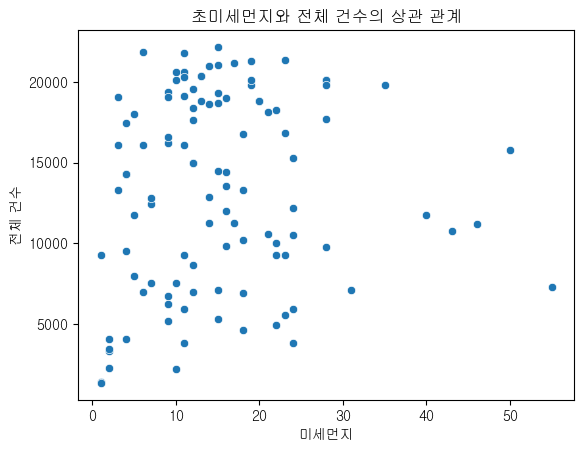

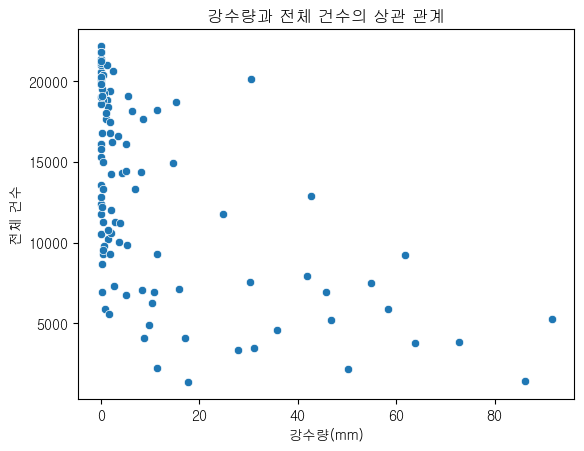

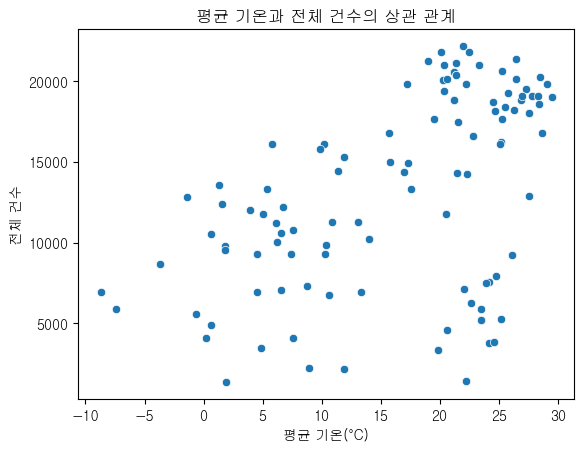

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# 미세먼지와 전체 건수의 시각화
sns.scatterplot(x='미세먼지', y='전체_건수', data=데이터)
plt.title("미세먼지와 전체 건수의 상관 관계")
plt.xlabel("미세먼지")
plt.ylabel("전체 건수")
plt.show()

# 초미세먼지와 전체 건수의 시각화
sns.scatterplot(x='초미세먼지', y='전체_건수', data=데이터)
plt.title("초미세먼지와 전체 건수의 상관 관계")
plt.xlabel("미세먼지")
plt.ylabel("전체 건수")
plt.show()

# 강수량과 전체 건수의 시각화
sns.scatterplot(x='일강수량(mm)', y='전체_건수', data=데이터)
plt.title("강수량과 전체 건수의 상관 관계")
plt.xlabel("강수량(mm)")
plt.ylabel("전체 건수")
plt.show()

# 평균 기온과 전체 건수의 시각화
sns.scatterplot(x='평균기온(°C)', y='전체_건수', data=데이터)
plt.title("평균 기온과 전체 건수의 상관 관계")
plt.xlabel("평균 기온(°C)")
plt.ylabel("전체 건수")
plt.show()

In [139]:
데이터.to_csv('check1.csv',index=False)

In [140]:
데이터

,기준_날짜,미세먼지,초미세먼지,지점,지점명,평균기온(°C),일강수량(mm),요일,주말,휴일,전체_건수
0,2023-04-03,58,32,108,서울,19.0,NaN,0,0,0,16354
1,2023-04-04,38,18,108,서울,17.6,6.9,1,0,0,13309
2,2023-04-05,20,10,108,서울,11.9,50.3,2,0,0,2191
3,2023-04-06,73,55,108,서울,8.8,2.7,3,0,0,7303
4,2023-04-07,74,33,108,서울,8.9,NaN,4,0,0,14320
...,...,...,...,...,...,...,...,...,...,...,...
257,2024-03-25,25,9,108,서울,10.6,5.1,0,0,0,6757
258,2024-03-26,4,1,108,서울,7.4,11.5,1,0,0,9299
259,2024-03-27,24,15,108,서울,10.4,NaN,2,0,0,15206
260,2024-03-28,25,11,108,서울,10.3,1.9,3,0,0,9280


In [144]:
import statsmodels.api as sm

# 회귀 분석을 위한 데이터셋 준비
데이터.dropna(inplace=True)  # 결측치가 있는 행 제거
X = 데이터[['일강수량(mm)', '평균기온(°C)']]
y = 데이터['전체_건수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체_건수   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.78e-31
Time:                        22:28:45   Log-Likelihood:                -1030.5
No. Observations:                 109   AIC:                             2067.
Df Residuals:                     106   BIC:                             2075.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8912.5883    597.173     14.925      0.0

coef : 회귀 계수           : 일강수량, 평균기온이 전체이용량에 미치는 영향

std err : 계수의 표준 오차 : 작을수록 추정치에 정확

t-statistic(t) : 값이 크면 독립변수가 ㅈ종속변수에 미치는 영향이 유의미함

p-value : 0.05 작아야 통계적으로 유의미한 영향을 줌

[0.025      0.975] : 신뢰구간 

In [145]:

강서_temp = pd.read_csv('./Code/yehdongwan/강서_tempv1.csv', encoding='cp949')
강서_temp.to_csv('check2.csv',index=False)

FileNotFoundError: [Errno 2] No such file or directory: './Code/yehdongwan/강서_tempv1.csv'